In [1]:
#import libraries
import pandas as pd

<div style="color:firebrick">Our goal in this project is to determine the best neighborhood in Pittsburgh. We decided the optimal way to determine the ‘best’ neighborhood was quality of life, which we chose to quantify via the following metrics:
    
- Median age at death, because a long life is positively correlated w/QOL via better health outcomes (higher = better)

- Number of firearm seizures, because it roughly correlates with the amount of violent crime (more = worse)

- Number of water features, because those correlate with better infrastructure (higher = better)

One dataset we almost used but did not was the number of trees per neighborhood, because we had no efficient way of sorting GPS coordinates into the necessary categories (neighborhoods).</div>

<Axes: xlabel='Neighborhood', ylabel='Number of Guns Seized'>

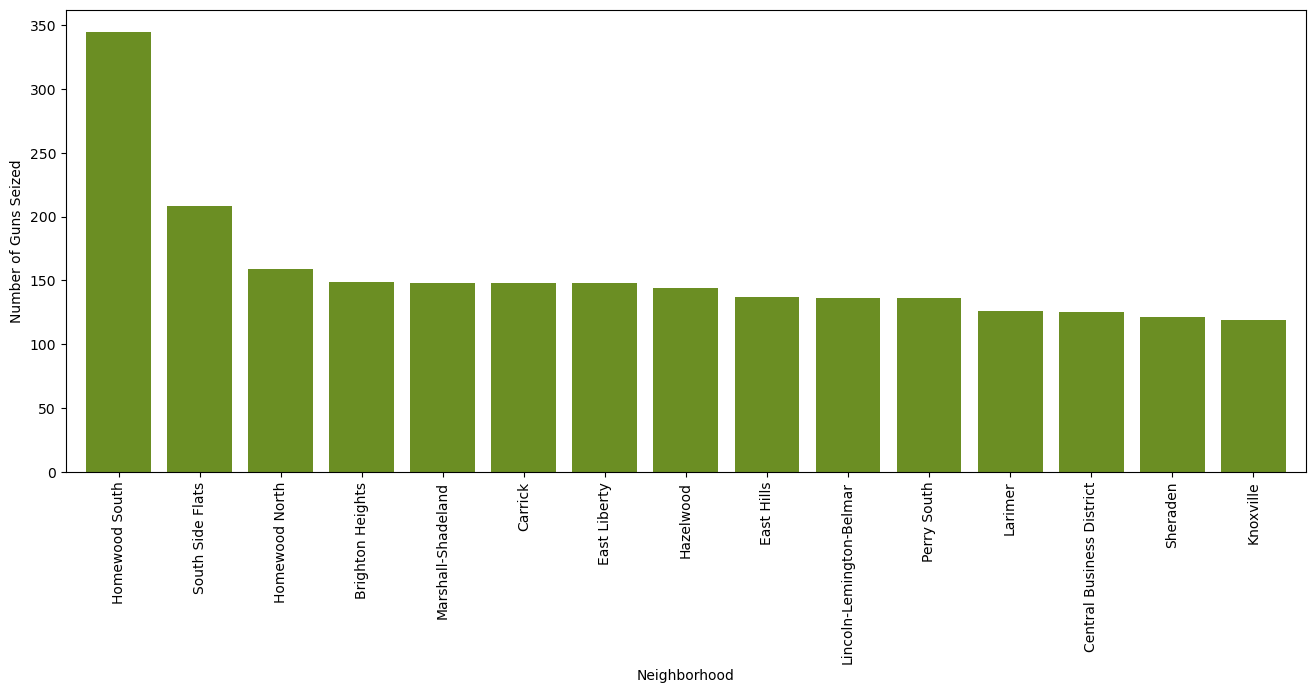

In [28]:
seizures = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
#counts firearm seizures
total_guns_series = seizures.groupby("neighborhood")["total_count"].sum().sort_values(ascending=False)
#plots firearm seizures
total_guns_series.iloc[0:15].plot(kind="bar", color="oliveDrab", xlabel="Neighborhood", ylabel="Number of Guns Seized", width = .8, figsize = (16,6))

<div style="color:royalblue">To clean our data, we utilized Pandas. We imported our data using ‘read_csv’  and the URL provided by WPRDC, as this provides an easy way to read and manipulate the data at hand.
<br></br>
For Firearm Seizures and Water Fixtures, we summed our data using ‘.sum()’ or ‘.values_counts()’ since it showed different types of firearms or water fixtures, and we just wanted to see the total per neighborhood.</div>

<Axes: xlabel='Neighborhood', ylabel='Number of Water Features'>

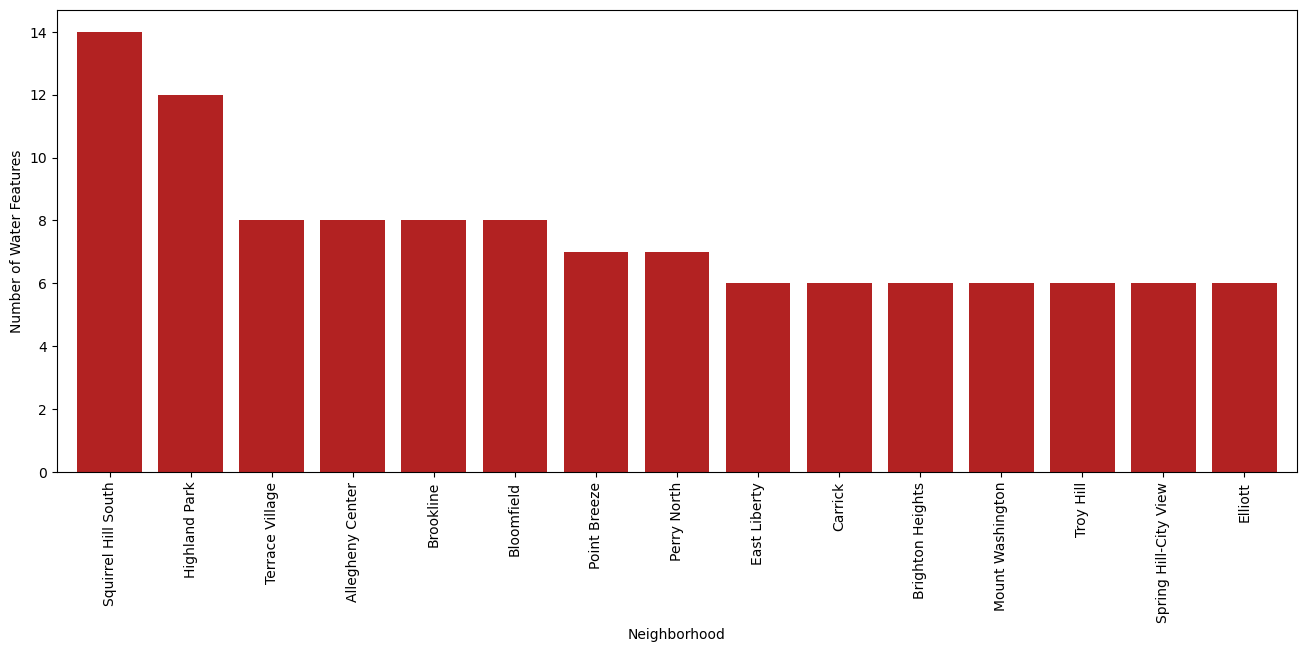

In [29]:
water_features = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7", index_col = "_id")
#counts water features
df_wf = water_features[["neighborhood","feature_type"]].sort_values(by="neighborhood")
df_vals = df_wf["neighborhood"].value_counts() 
#plots water features
df_vals.iloc[0:15].plot(kind="bar", color="firebrick", xlabel="Neighborhood", ylabel="Number of Water Features", width = .8, figsize = (16,6))

<div style="color:royalblue">For the Median Age of Death, we had to remove neighborhoods with null values.
<br></br>
Afterwards, we sorted the data from highest to lowest, allowing us to get an accurate series for that graph. For Firearms seizures, we created a graph showing the total amount of guns per neighborhood, as we felt that gave us the most accurate representation of the quality of life in those neighborhoods. We have another graph that shows the total number of water fixtures per neighborhood, with the higher being better. For the Median Age of Death, we sorted it from highest to lowest, with the highest median age being the best.</div>

<Axes: xlabel='MEDIAN AGE', ylabel='NEIGHBORHOOD'>

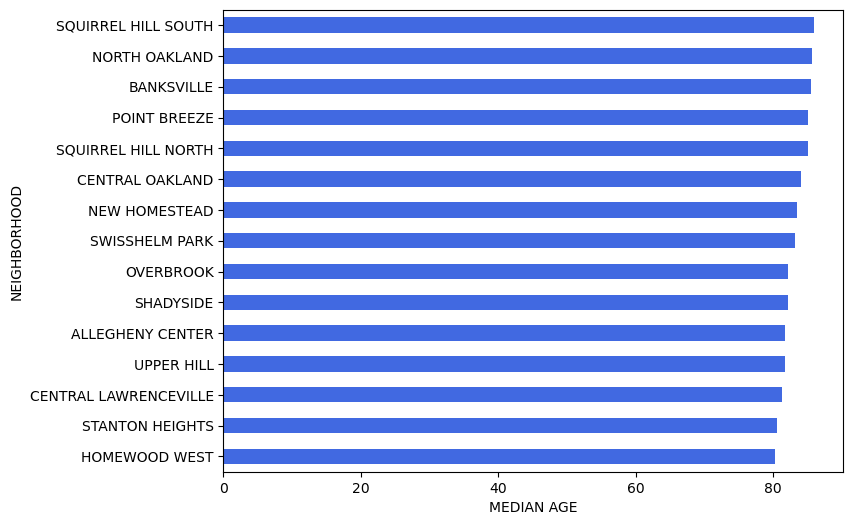

In [36]:
df_ma = pd.read_csv("https://data.wprdc.org/datastore/dump/c2e1500a-a12a-4e91-be94-76c6a892b7e2?bom=True")
#tracks median age of death
median_age_series = (
    df_ma.groupby("NEIGHBORHOOD")["TOTAL MD AGE AT DEATH"]
    .median()
    .fillna(0)
)
pd.set_option("display.max_rows", None)
#removes empty values, sorts remaining from highest to lowest
median_age_series = median_age_series[median_age_series != 0.0]
median_age_series = median_age_series.dropna()
ranked_median_age = median_age_series.sort_values(ascending=False)
#plots median age of death
ranked_median_age.iloc[0:15][::-1].plot(kind="barh", color="royalblue", xlabel="MEDIAN AGE", figsize = (8,6))

<div style="color:oliveDrab">To plot the data, we used pandas’ built in plot feature for the first 15 highest values in each data set. We ensured that our data was labeled to maintain readability.
<br></br>
After we finished our own notebooks, we decided on the best way to combine them to have the best representation for each neighborhood’s QoL. The formula we came up with to calculate the QoL was equal to <br></br>

**(water features/14)\*((345-guns seized)/345)\*(median age/85.9)**
<br></br>
This means the more water features, the higher the age, and the less guns, the better, with the absolute best neighborhood possible scoring a perfect 1.
In order to combine notebooks, we duplicated the individual series we made in a new notebook, then made a data frame out of it. We checked every neighborhood, despite only graphing the first 15 in the individual plots. With the data frame, we were able to perform the necessary math operations to create a qol score for each neighborhood (skipping neighborhoods not included in all three datasets). 
<br></br>
We plotted our QOL score per neighborhood from highest to lowest. We made sure our plot was still sorted by neighborhood and that the neighborhoods were organized from best (highest score) to worst (lowest score). Our plot also only shows the top 10 neighborhoods.</div>

<Axes: xlabel='Neighborhood', ylabel='QoL Score'>

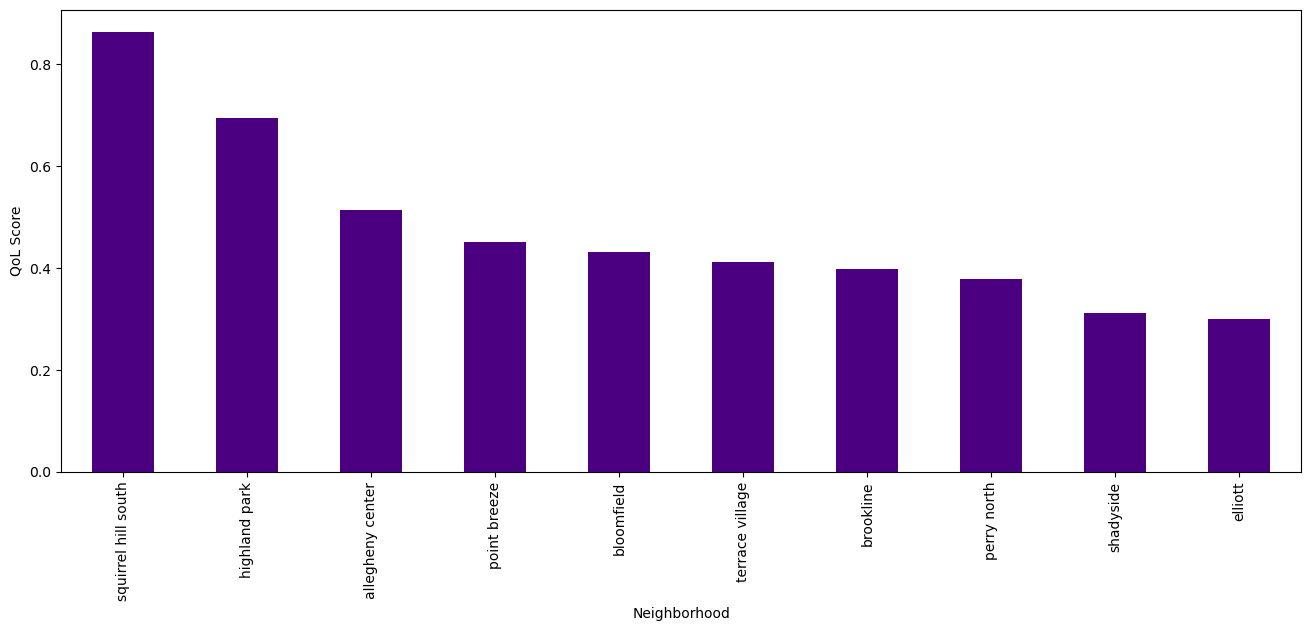

In [37]:
#convert all three to dataframes, convert to lowercase, combine into one frame for testing
guns_df = total_guns_series.rename("guns").to_frame()
water_df = df_vals.rename("water_features").to_frame()
age_df = median_age_series.rename("age").to_frame()
guns_df.index = guns_df.index.str.strip().str.lower()
water_df.index = water_df.index.str.strip().str.lower()
age_df.index = age_df.index.str.strip().str.lower()
merged = guns_df.join(water_df, how="inner").join(age_df, how="inner")

#combine all three metrics into a predetermined superscore in a fourth column
merged["qolscore"] = (
    (merged["water_features"] / 14) *
    ((345 - merged["guns"]) / 345) *
    (merged["age"] / 85.9)
)
#sorts the data from largest (best) to smallest (worst). then plots
merged_sorted = merged.sort_values("qolscore", ascending=False)
merged_sorted["qolscore"].iloc[0:10].plot(kind="bar", color="indigo", xlabel="Neighborhood", ylabel="QoL Score", figsize=(16,6))

**According to the data and our scoring methods, the best neighborhood is Squirrel Hill South.**

<p style="color:firebrick">Greg: My personal favorite neighborhood in Pittsburgh is Lawrenceville. It’s very walkable and very pretty with plenty to do during both night and day.</p>

<p style="color:royalblue">Viraj: My favorite neighborhood in Pittsburgh would have to be Shadyside because it has a lot of shops and restaurants for one to discover. You can spend weeks exploring the place, and you still wouldn't see it all. Especially since there are a lot of cafes there.</p>

<p style="color:oliveDrab">Mei: My personal favorite neighborhood is squirrel hill south because it’s fun to walk around with friends. The shopping district sits on the border of squirrel hill south, and it’s filled with casual shopping; some of my favorites include a record shop, bookstore, and a toy store. There’s also endless cafes and takeout options. It’s gratifying to know that the data supports squirrel hill south being the best!</p>